In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as dts


In [19]:
df = pd.read_csv("dataset2.csv")

In [20]:
df.head()

,title,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,https://i5.walmartimages.com/asr/1fbbd523-8554...,13.92,40.3-ounce,1142.5
1,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,walmart.com,https://i5.walmartimages.com/asr/99a53df0-0471...,3.76,10 oz,283.5
2,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.4,740,walmart.com,https://i5.walmartimages.com/asr/e6aba325-608e...,9.97,25.9 ounce,734.3
3,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,walmart.com,https://i5.walmartimages.com/asr/a5be9586-b75d...,9.92,42.5 oz,1204.9
4,great value classic roast medium ground coffee...,classic roast,4.7,1598,walmart.com,https://i5.walmartimages.com/asr/de42310c-4cd6...,9.98,48 oz,1360.8


## Algoritma K-mean Clustering

In [34]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
points = df[['rating', 'price']]
model.fit(points)

KMeans(n_clusters=3)

In [25]:
cluster_array = model.labels_

In [26]:
print(cluster_array)

[1 1 1 ... 1 0 1]


### Grafik Visualisasi

In [27]:
X = points['rating']
Y = points['price']

In [28]:
cr = model.cluster_centers_
cr

array([[ 3.88734568, 23.5837963 ],
       [ 4.01377649,  9.59149326],
       [ 3.94473684, 54.23052632]])

In [29]:
cr_X = cr[:,0]
cr_Y = cr[:,1]

crt_X = pd.DataFrame(cr_X)
crt_X.head()

,0
0,3.887346
1,4.013776
2,3.944737


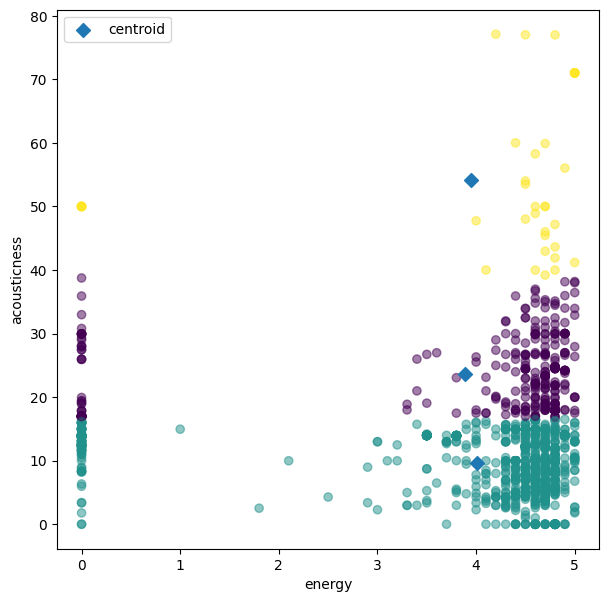

In [31]:
plt.figure(figsize=(7,7))
plt.scatter(X, Y, alpha=0.5, c=cluster_array)
plt.scatter(cr_X, cr_Y, marker='D', s=50, label='centroid')
plt.xlabel("energy")
plt.ylabel('acousticness')
plt.legend()
plt.show()

### Metode Elbow

In [32]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

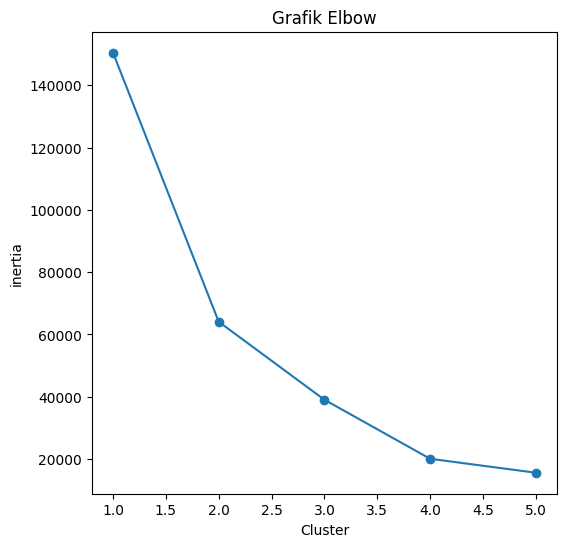

In [33]:
plt.figure(figsize=(6,6))
plt.plot(cluster_range, inertias, '-o')
plt.title("Grafik Elbow")
plt.xlabel("Cluster")
plt.ylabel('inertia')
plt.show()